In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("C:\MyFILES\DV-project\Zomato\zomato.csv")
df.shape

(51717, 17)

#### Data Preprocessing

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
df_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]
df_nan

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [6]:
for i in df_nan:
    p=(df[i].isna().sum()/df.shape[0]*100)
    print(i,p,'%')

rate 15.033741322969234 %
phone 2.335789005549432 %
location 0.04060560357329312 %
rest_type 0.438927238625597 %
dish_liked 54.29162557766305 %
cuisines 0.08701200765705668 %
approx_cost(for two people) 0.669025658874258 %


In [7]:
df.dropna(axis='index', subset=['rate'], inplace=True)

In [8]:
df.shape

(43942, 17)

In [9]:
def split(x):
    return x.split('/')[0]

In [10]:
df['rate']=df['rate'].apply(split)

In [11]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [13]:
df.replace('NEW',0,inplace=True)

In [14]:
df.replace('-',0,inplace=True)

In [15]:
df['rate']=df['rate'].astype(float)

In [16]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### Extracting location

In [12]:
df['location'].value_counts().to_dict()



{'BTM': 4261,
 'Koramangala 5th Block': 2381,
 'HSR': 2128,
 'Indiranagar': 1936,
 'JP Nagar': 1849,
 'Jayanagar': 1718,
 'Whitefield': 1693,
 'Marathahalli': 1503,
 'Bannerghatta Road': 1324,
 'Koramangala 6th Block': 1111,
 'Koramangala 7th Block': 1089,
 'Brigade Road': 1084,
 'Bellandur': 1078,
 'Koramangala 1st Block': 965,
 'Electronic City': 964,
 'Sarjapur Road': 919,
 'Ulsoor': 901,
 'Koramangala 4th Block': 864,
 'MG Road': 836,
 'Banashankari': 805,
 'Kalyan Nagar': 748,
 'Malleshwaram': 658,
 'Richmond Road': 634,
 'Basavanagudi': 628,
 'Residency Road': 608,
 'Brookefield': 581,
 'Frazer Town': 578,
 'Church Street': 550,
 'Kammanahalli': 525,
 'New BEL Road': 523,
 'Banaswadi': 499,
 'Lavelle Road': 499,
 'Rajajinagar': 487,
 'Cunningham Road': 475,
 'Domlur': 429,
 'Shanti Nagar': 390,
 'Old Airport Road': 386,
 'St. Marks Road': 343,
 'Commercial Street': 309,
 'Ejipura': 296,
 'Shivajinagar': 277,
 'Jeevan Bhima Nagar': 262,
 'Vasanth Nagar': 252,
 'Koramangala 8th Blo

In [17]:
loc=df.groupby(['location'])['rate'].mean().index
loc

Index(['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road', 'Basavanagudi',
       'Basaveshwara Nagar', 'Bellandur', 'Bommanahalli', 'Brigade Road',
       'Brookefield', 'CV Raman Nagar', 'Central Bangalore', 'Church Street',
       'City Market', 'Commercial Street', 'Cunningham Road', 'Domlur',
       'East Bangalore', 'Ejipura', 'Electronic City', 'Frazer Town',
       'HBR Layout', 'HSR', 'Hebbal', 'Hennur', 'Hosur Road',
       'ITPL Main Road, Whitefield', 'Indiranagar', 'Infantry Road',
       'JP Nagar', 'Jalahalli', 'Jayanagar', 'Jeevan Bhima Nagar', 'KR Puram',
       'Kaggadasapura', 'Kalyan Nagar', 'Kammanahalli', 'Kanakapura Road',
       'Kengeri', 'Koramangala', 'Koramangala 1st Block',
       'Koramangala 2nd Block', 'Koramangala 3rd Block',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block',
       'Koramangala 8th Block', 'Kumaraswamy Layout', 'Langford Town',
       'Lavelle Road', 'MG Road', 'Magadi

In [18]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [19]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'HSR', 'Marathahalli', 'Koramangala 7th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [20]:
rating=pd.DataFrame()

In [21]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="app")

In [ ]:
lat=[]
lon=[]
for location in loc:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

#### Average rating

In [ ]:
rating['location']=loc
rating['lat']=lat
rating['lon']=lon


In [45]:
avg_rating=df.groupby(['location'])['rate'].mean().values

In [50]:
rating['avg_rating']=avg_rating

In [51]:
rating.head()

,location,avg_rating
0,BTM,3.296128
1,Banashankari,3.373292
2,Banaswadi,3.362926
3,Bannerghatta Road,3.271677
4,Basavanagudi,3.478185


In [52]:
rating.dropna(inplace=True)

In [26]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [27]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [28]:
HeatMap(rating[['lat','lon','avg_rating']],zoom=20,radius=15).add_to(basemap)
basemap

In [29]:
df.shape

(43942, 17)

<Axes: xlabel='avg_rating', ylabel='Density'>

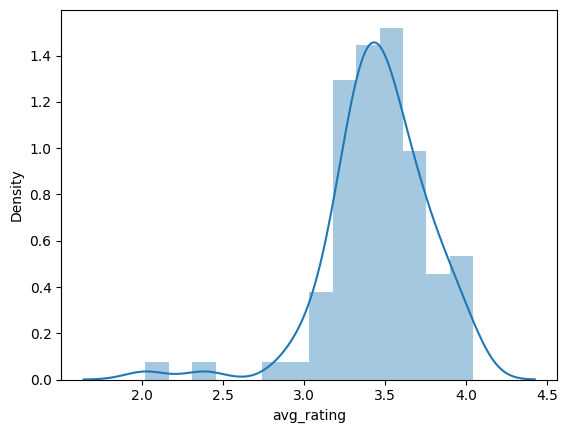

In [30]:
sns.distplot(rating['avg_rating'])

#### HEAtmap

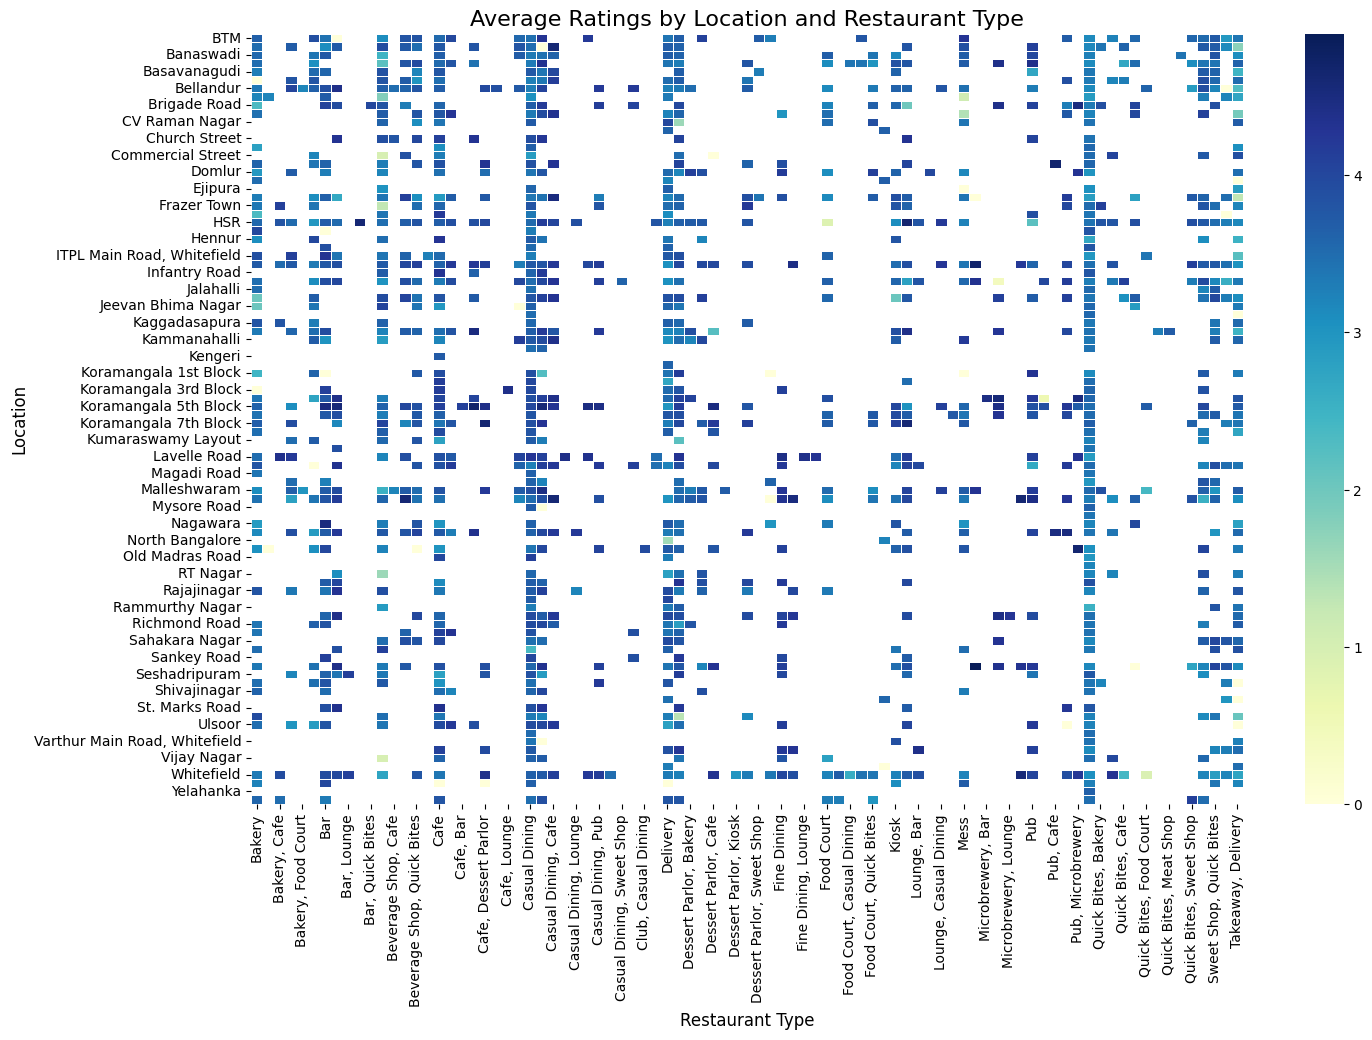

In [56]:
#HEATMAP
# Grouping data by location and restaurant type
heatmap_data = df.groupby(['location', 'rest_type'])['rate'].mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Ratings by Location and Restaurant Type', fontsize=16)
plt.xlabel('Restaurant Type', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.show()

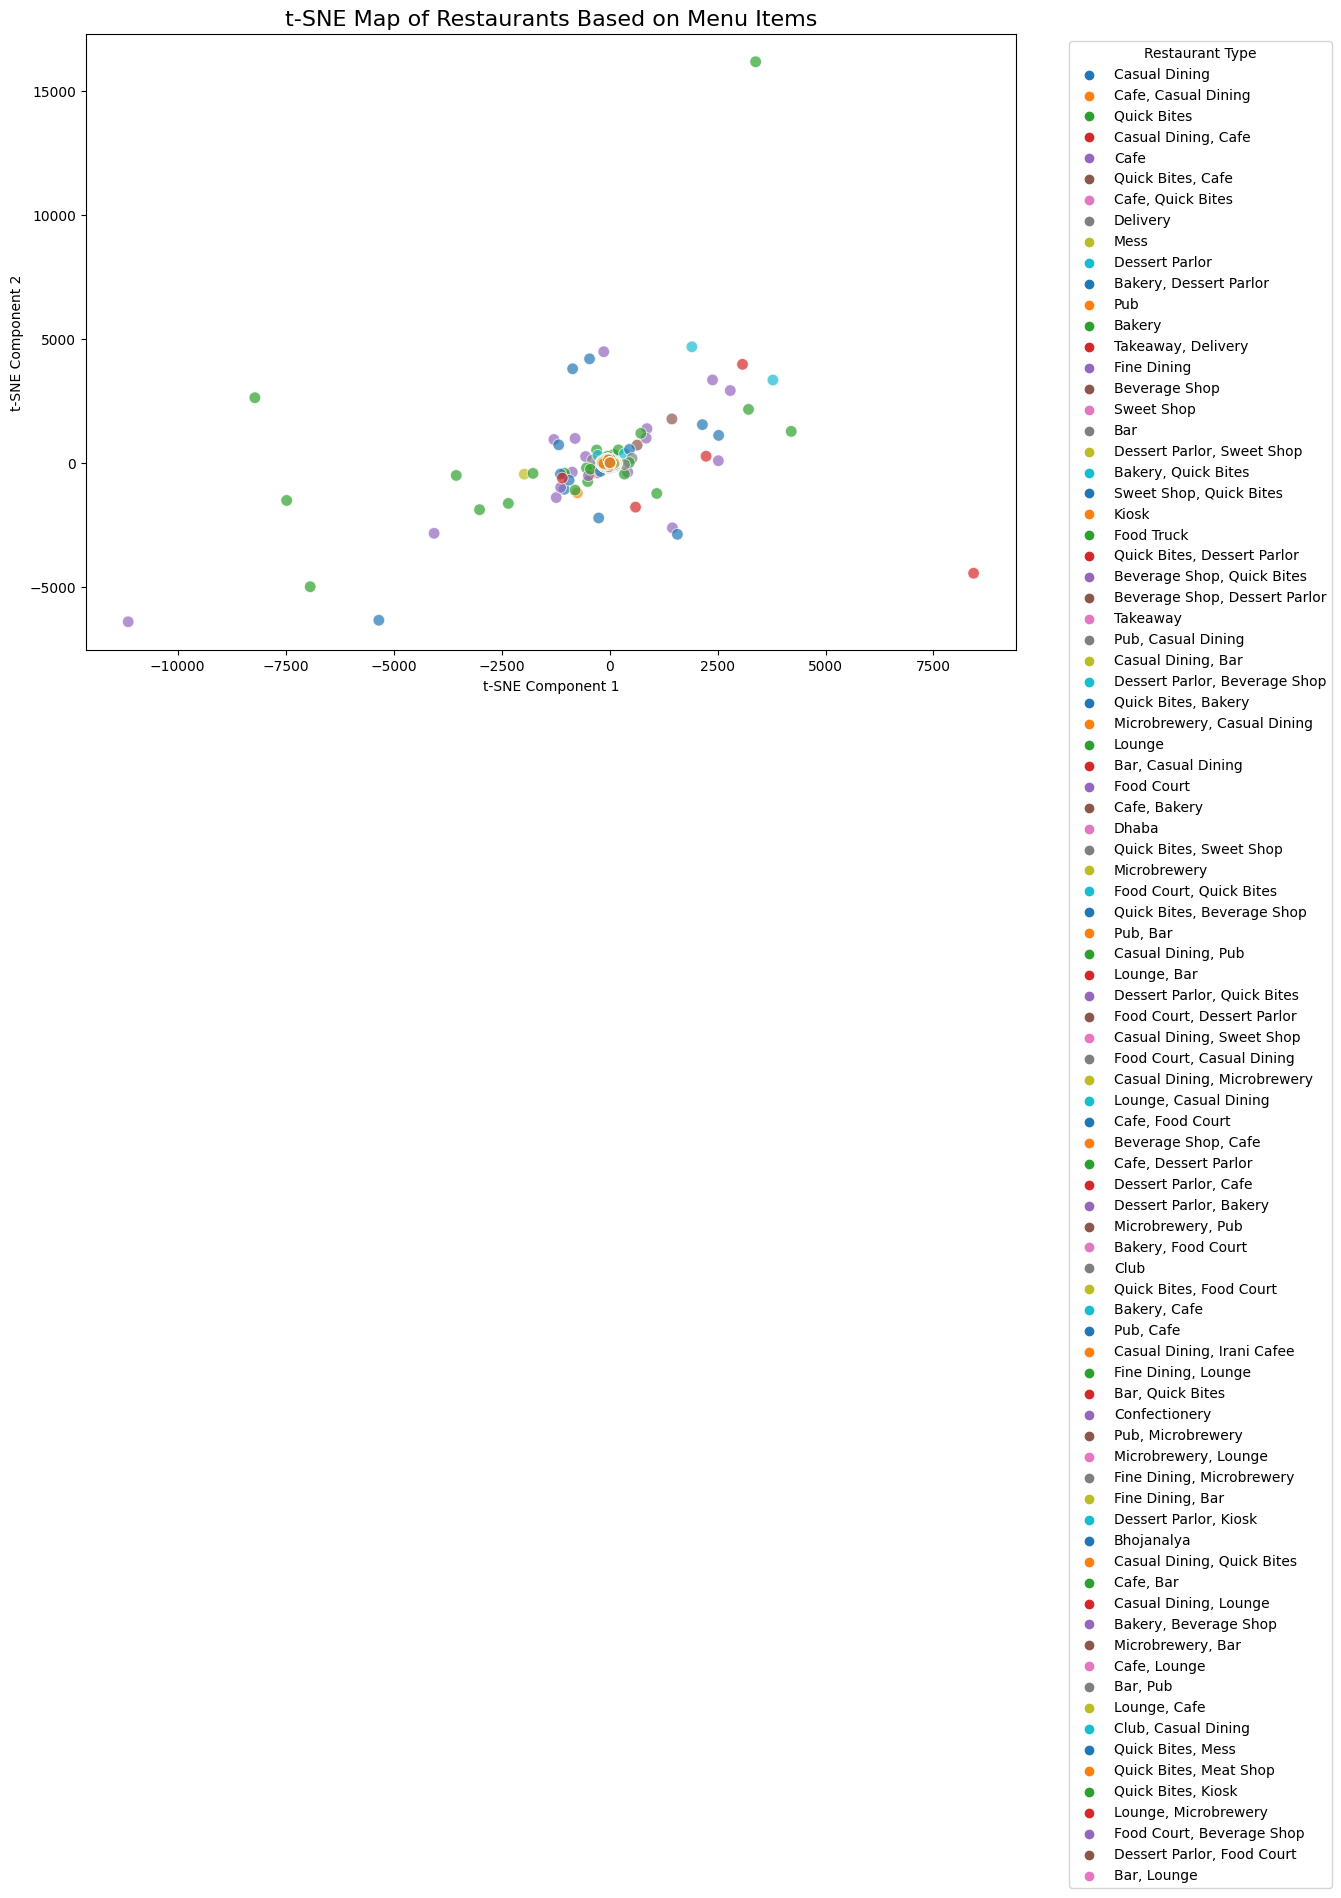

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Step 1: Handle missing data
#df['menu_item'] = df['menu_item'].fillna('')

# Step 2: Convert the menu items into TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
menu_vectors = vectorizer.fit_transform(df['menu_item'])

# Step 3: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
menu_tsne = tsne.fit_transform(menu_vectors.toarray())

# Step 4: Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(menu_tsne, columns=['x', 'y'])
df_tsne['rest_type'] = df['rest_type']

# Step 5: Plot the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='x', y='y', hue='rest_type', data=df_tsne, palette='tab10', s=70, alpha=0.7
)
plt.title('t-SNE Map of Restaurants Based on Menu Items', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Restuarants accepting online order

In [34]:
fig = px.pie(
    names=['accepted', 'not accepted'],  # Labels for the categories
    values= x,  # Values for each category
    title="Bengaluru Restaurants - Online order Acceptance Distribution",  # Title of the plot
    color_discrete_sequence=px.colors.qualitative.Set2,  # Color palette
    hole=0.3  # Optional: Make it a donut chart
)

# Update layout to show percentage labels
fig.update_traces(
    textinfo='percent+label',  # Show percentage and category labels
    pull=[0, 0.1]  # Explode the 'not accepted' slice
)

# Display the chart
fig.show()

In [38]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [40]:
df_sunburst = df.groupby(['online_order', 'book_table', 'listed_in(type)']).size().reset_index(name='count')

# Create the sunburst chart
fig = px.sunburst(
    df_sunburst,
    path=['online_order', 'book_table', 'listed_in(type)'],  # Define the hierarchy (removed 'city')
    values='count',  # Use the count as the size of each segment
    title="Bengaluru Restaurants - Hierarchical Distribution (Without City)",
    color='listed_in(type)',  # Color based on the type of listing
    color_discrete_sequence=px.colors.qualitative.Set2  # Optional: Choose color palette
)

# Increase the size of the chart
fig.update_layout(
    width=1200,  # Set the width of the chart
    height=900,  # Set the height of the chart
    font=dict(size=16),  # Increase font size for better readability
    title_font=dict(size=24),  # Increase the title font size
)

# Display the chart
fig.show()


#### Restaurants who provide table booking

In [35]:

# Count the values
x = df['book_table'].value_counts()

# Create the pie chart with custom colors
fig = px.pie(
    names=['Not Accepted', 'Accepted'],  # Labels
    values=x,  # Values
    title="Booking Table Distribution",  # Title
    color_discrete_sequence=['#FF9999', '#66B3FF']  # Custom color palette
)

# Update the layout for label visibility and explode effect
fig.update_traces(
    textinfo='percent+label',  # Show percentage and labels
    pull=[0, 0.1]  # Explode the 'book' slice
)

# Show the chart
fig.show()

#### Restaurant Types distribution

In [25]:
df['rest_type'].isna().sum()

151

In [26]:
df['rest_type'].dropna(inplace=True)

In [30]:
top_rest_types = df['rest_type'].value_counts().nlargest(20)

trace1 = go.Bar(
    x=top_rest_types.index,  # Categories
    y=top_rest_types.values,  # Counts
    name='Rest Type',  # Legend name
    marker=dict(color='skyblue')  # Bar color
)

fig = go.Figure(data=[trace1])
fig.update_layout(
    title="Top 20 Restaurant Types",
    xaxis_title="Restaurant Type",
    yaxis_title="Count",
    template="plotly_white"  # Clean theme
)
fig.show()

Text(0.5, 0, 'Number of outlets')

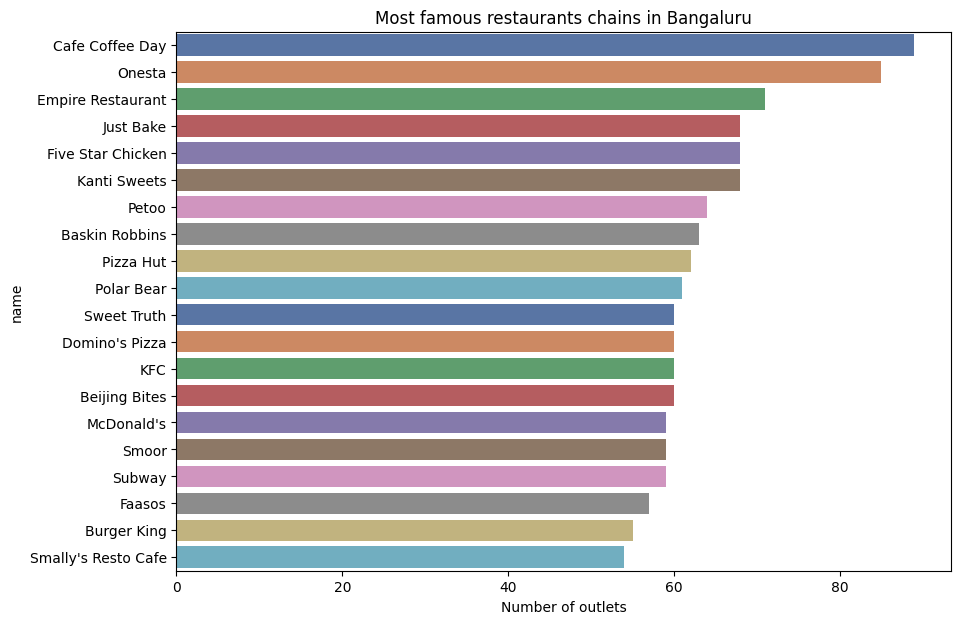

In [31]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

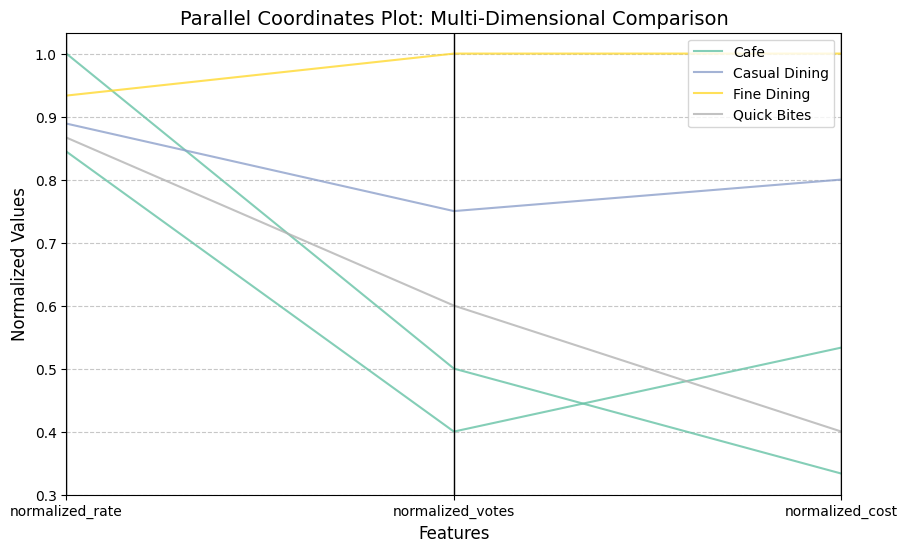

In [31]:
from pandas.plotting import parallel_coordinates

# Purpose: The parallel coordinates plot helps visualize multi-dimensional relationships in the dataset.
# For example, comparing ratings, votes, and cost across restaurant types (rest_type).

# Sample DataFrame for demonstration
zomato_data = pd.DataFrame({
    'rate': [4.5, 4.0, 3.8, 4.2, 3.9],
    'votes': [100, 150, 80, 200, 120],
    'approx_cost(for two people)': [500, 1200, 800, 1500, 600],
    'rest_type': ['Cafe', 'Casual Dining', 'Cafe', 'Fine Dining', 'Quick Bites']
})

# Normalize numerical columns for better comparison
zomato_data['normalized_rate'] = zomato_data['rate'] / zomato_data['rate'].max()
zomato_data['normalized_votes'] = zomato_data['votes'] / zomato_data['votes'].max()
zomato_data['normalized_cost'] = zomato_data['approx_cost(for two people)'] / zomato_data['approx_cost(for two people)'].max()

# Prepare data for parallel coordinates
parallel_data = zomato_data[
    ['rest_type', 'normalized_rate', 'normalized_votes', 'normalized_cost']
]

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(
    parallel_data, 'rest_type', colormap=plt.get_cmap('Set2'), alpha=0.8
)

# Add labels and title
plt.title('Parallel Coordinates Plot: Multi-Dimensional Comparison', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Normalized Values', fontsize=12)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
rating

,location,lat,lon,avg_rating
0,BTM,45.954851,-112.496595,3.296128
1,Banashankari,15.887678,75.704678,3.373292
2,Banaswadi,13.014162,77.651854,3.362926
3,Bannerghatta Road,12.910990,77.600015,3.271677
4,Basavanagudi,12.941726,77.575502,3.478185
...,...,...,...,...
87,West Bangalore,13.009652,77.553054,2.020000
88,Whitefield,44.373230,-71.611921,3.384170
89,Wilson Garden,12.948934,77.596827,3.257635
90,Yelahanka,13.100698,77.596345,3.640000


In [33]:
import plotly.express as px

# Create the bubble map
fig = px.scatter_mapbox(
    rating,
    lat='lat',
    lon='lon',
    size='avg_rating',  # Bubble size
    size_max=15,  # Maximum bubble size
    zoom=3,
    color='avg_rating',  # Optional: to color-code the bubbles
    color_continuous_scale='Viridis',
    hover_name='location',
    title='Bubble Map of Average Ratings'
)
# Increase map size by specifying height and width
fig.update_layout(
    mapbox_style="open-street-map",
    height=800,  # Increase height
    width=1200,  # Increase width
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


#### Geolocation

In [34]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="app")

In [35]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [36]:
locations['new_Name']='Bangalore '+locations['Name']

In [37]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [38]:
locations['geo_loc']=lat_lon

In [39]:
locations

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.9467026, 77.5300705)"
3,Jayanagar,Bangalore Jayanagar,"(12.9292731, 77.5824229)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9067683, 77.5595021)"
...,...,...,...
87,Sahakara Nagar,Bangalore Sahakara Nagar,"(17.2569932, 80.1536665)"
88,Jalahalli,Bangalore Jalahalli,"(13.0394104, 77.5197351)"
89,Nagarbhavi,Bangalore Nagarbhavi,"(12.9819569258295, 77.51837412776779)"
90,Peenya,Bangalore Peenya,"(13.0329814, 77.5331801)"


In [40]:
locations.to_csv('zomato_locations.csv',index=False)

In [41]:
locations.shape

(92, 3)

In [42]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [43]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

,Name,count
0,BTM,4261
1,Koramangala 5th Block,2381
2,HSR,2128
3,Indiranagar,1936
4,JP Nagar,1849


In [44]:
#combining both the dfs
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head(3)

,Name,count,new_Name,geo_loc
0,BTM,4261,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2381,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)"
2,HSR,2128,Bangalore HSR,"(29.1523467, 75.7245798)"


In [45]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [46]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (29.1523467, 75.7245798), (12.9732913, 77.6404672),
       (12.9096941, 77.5866067), (12.9292731, 77.5824229),
       (44.3732302, -71.6119206), (12.9552572, 77.6984163),
       (12.910990393293789, 77.6000150374556), (12.9390255, 77.6238477),
       (12.9364846, 77.6134783), (-36.97491687792355, 174.7822814774719),
       (12.9361208, 77.66718430340032), (12.9277245, 77.6327822),
       (12.8436448, 77.6686835), (12.924399175056287, 77.65112129525873),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (40.60870780172884, -74.09088360811757), (12.9417261, 77.5755021),
       (13.053510009509699, 77.62325764789338), (33.5934382, -79.0347133),
       (12.9986827, 77.615525), (40.71626903932852, -74.00687308628396),
       (13.0093455, 77.6377094), (13.026398235874993, 77.5718347734

In [47]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [48]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

#### Restaurant cluster in banglore

In [49]:
from folium.plugins import FastMarkerCluster
# Plugin: FastMarkerCluster
FastMarkerCluster(data=Restaurant_locations[['lat','lon','count']].values.tolist()).add_to(basemap)

basemap

#### extracting lat_lon from location

In [24]:
df['address'].value_counts().to_dict()

{'Delivery Only': 95,
 'The Ritz-Carlton, 99, Residency Road, Bangalore': 61,
 'Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore': 49,
 '14th Main, 4th Sector, HSR, Bangalore': 47,
 '1, 100 Feet Ring Road, 1st Phase, 2nd Stage, BTM, Bangalore': 43,
 'Citrus Hotels, 34, Cunningham Road, Bangalore': 41,
 '710, Thubarahalli, Varthur Main Road, Whitefield, Bangalore': 39,
 'The Park Bangalore, 14/7, MG Road, Bangalore': 38,
 'Radisson Blu, 1, Palace Road, Race Course Road, Bangalore': 37,
 'The Oberoi, 37-39, MG Road, Bangalore': 36,
 '2, 2nd Floor, 100 Feet Road, Koramangala 5th Block, Bangalore': 35,
 'Vivanta By Taj, 41/3, MG Road, Bangalore': 35,
 '18, Ali Askar Road, Cunningham Road, Bangalore': 34,
 '15/A, 4th Main, Behind Ayyappa Swamy Temple, Madiwala, BTM, Bangalore': 33,
 '2nd Floor, 1 MG Mall, Trinity Circle, MG Road, Bangalore': 32,
 '17, SBI Colony Service Road, Koramangala 3rd Block, Bangalore': 31,
 'Davanam Plaza, Next To Total Mall Madivala, Hosur Road, Sidharata Colon

In [25]:
df_loc = df[~df['address'].str.contains('Delivery Only', na=False)]

# Keep only the specified columns in df_loc
df_loc = df_loc[['address', 'name', 'rate', 'votes', 'location']]


In [26]:
df_loc

,address,name,rate,votes,location
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,787,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,918,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,88,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,166,Basavanagudi
...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,3.7,34,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,2.5,81,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,3.6,27,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,4.3,236,"ITPL Main Road, Whitefield"


In [27]:
df['name'].value_counts()

name
Cafe Coffee Day               89
Onesta                        85
Empire Restaurant             71
Just Bake                     68
Five Star Chicken             68
                              ..
SV Food Garden                 1
Ginger restaurant              1
Darjeeling Hot Momos           1
Sri Annapoorna Andhra Mess     1
SeeYa Restaurant               1
Name: count, Length: 7162, dtype: int64

In [28]:
df_loc[df_loc['name'] == "Cafe Coffee Day"]

,address,name,rate,votes,location
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,3.6,28,Banashankari
254,"28th Main, 8th Block, Jayanagar, Bangalore",Cafe Coffee Day,3.2,17,Jayanagar
889,"Gopalan Innovation Mall, Bannerghatta Road, Ba...",Cafe Coffee Day,3.6,19,Bannerghatta Road
1186,"524, 60 Feet Road,Vijaya Bank Layout, Opposite...",Cafe Coffee Day,3.7,26,Bannerghatta Road
1898,"524, 60 Feet Road,Vijaya Bank Layout, Opposite...",Cafe Coffee Day,3.7,26,Bannerghatta Road
...,...,...,...,...,...
49569,"1570, Vinutha Tower, HSR Layout, Sector 1, Hos...",Cafe Coffee Day,3.1,13,Sarjapur Road
49691,"1570, Vinutha Tower, HSR Layout, Sector 1, Hos...",Cafe Coffee Day,3.1,13,Sarjapur Road
50119,"SH 35, Global Ventures, Whitefield Main Road, ...",Cafe Coffee Day,3.6,45,Whitefield
50282,"SH 35, Global Ventures, Whitefield Main Road, ...",Cafe Coffee Day,3.6,45,Whitefield


In [32]:
# Drop duplicates based on the 'address' column
df_cleaned = df_loc.drop_duplicates(subset='address', keep='first')

df_cleaned

,address,name,rate,votes,location
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,787,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,918,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,88,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,166,Basavanagudi
...,...,...,...,...,...
51611,"Unit 04-01, 4th floor, Ascendas Park Square Ma...",Chung Wah,2.5,73,"ITPL Main Road, Whitefield"
51614,"107/PA, ITPL Main Road, Whitefield, Bangalore",Nawabs Empire,3.2,5,"ITPL Main Road, Whitefield"
51628,"Cessna Business Park, Sarjapur ÃÂÃÂÃÂÃÂ...",Nook - Aloft Bengaluru Cessna Business Park,4.2,411,Bellandur
51632,"44, Kodigehalli to Hoodi Main Road, Mahadevapu...",SeeYa Restaurant,3.3,4,KR Puram


In [36]:
df_cleaned.to_csv('address_zomato.csv', index=False)  # index=False prevents writing the row indices to the file

In [120]:
loc=df_cleaned.groupby(['address'])['rate'].mean().index
loc

(9499,)

#### Geocoding

In [1]:
'''
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="nkrdharmendra@gmail.com")

# Function to fetch latitude and longitude
def fetch_coordinates(address):
    try:
        location = geolocator.geocode(address, timeout=)
        if location:
            return location.latitude, location.longitude
        else:
            return np.nan, np.nan
    except (GeocoderTimedOut, Exception) as e:
        return np.nan, np.nan

# Create columns for latitude and longitude
df['Latitude'], df['Longitude'] = zip(*df['address'].apply(fetch_coordinates))

# Save the dataframe to a CSV file
df.to_csv('addresses_with_coordinates.csv', index=False)

print("Coordinates added and saved to CSV!")
print(df)
'''

In [5]:
df_rest_loc=pd.read_csv(r'C:\MyFILES\DV-project\Zomato\addresses_with_coordinates.csv')
df_rest_loc

,address,name,rate,votes,location,Latitude,Longitude
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,Banashankari,12.918841,77.554214
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,787,Banashankari,NaN,NaN
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,918,Banashankari,NaN,NaN
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,88,Banashankari,NaN,NaN
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,166,Basavanagudi,NaN,NaN
...,...,...,...,...,...,...,...
9494,"Unit 04-01, 4th floor, Ascendas Park Square Ma...",Chung Wah,2.5,73,"ITPL Main Road, Whitefield",NaN,NaN
9495,"107/PA, ITPL Main Road, Whitefield, Bangalore",Nawabs Empire,3.2,5,"ITPL Main Road, Whitefield",NaN,NaN
9496,"Cessna Business Park, Sarjapur ÃÂÃÂÃÂÃÂ...",Nook - Aloft Bengaluru Cessna Business Park,4.2,411,Bellandur,NaN,NaN
9497,"44, Kodigehalli to Hoodi Main Road, Mahadevapu...",SeeYa Restaurant,3.3,4,KR Puram,NaN,NaN


In [7]:
df_rest_loc.dropna(inplace=True)

In [11]:
df_rest_loc.columns


Index(['address', 'name', 'rate', 'votes', 'location', 'Latitude',
       'Longitude'],
      dtype='object')

#### Normalized score for rate and vote

In [15]:
# Calculate Normalized Score
df_rest_loc['normalized_score'] = df_rest_loc['rate'] * np.log1p(df_rest_loc['votes'])

In [16]:
import pandas as pd
import plotly.express as px

fig = px.scatter_mapbox(
    df_rest_loc,
    lat='Latitude',  
    lon='Longitude', 
    hover_name='name',  
    color='normalized_score',
  #hover_data=['other_column'], 
    zoom=10,  
    center={"lat": df_rest_loc['Latitude'].mean(), "lon": df_rest_loc['Longitude'].mean()},  
    title="Scatter Plot on Map",
)
# Increase map size by specifying height and width
fig.update_layout(
    mapbox_style="open-street-map",
    height=800,  
    width=1200,  
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()


In [17]:
df_rest_loc.columns

Index(['address', 'name', 'rate', 'votes', 'location', 'Latitude', 'Longitude',
       'normalized_score'],
      dtype='object')

In [19]:
# Create the bubble map
fig = px.scatter_mapbox(
    df_rest_loc,
    lat='Latitude',
    lon='Longitude',
    size='normalized_score',  # Bubble size
    size_max=15,  # Maximum bubble size
    zoom=3,
    color='rate',  # Optional: to color-code the bubbles
    color_continuous_scale='Viridis',
    hover_name='name',
    title='Bubble Map of Average Ratings'
)
# Increase map size by specifying height and width
fig.update_layout(
    mapbox_style="open-street-map",
    height=800,  # Increase height
    width=1200,  # Increase width
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()


#### Guhan

In [29]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

#### JAYASri

#### nimisha

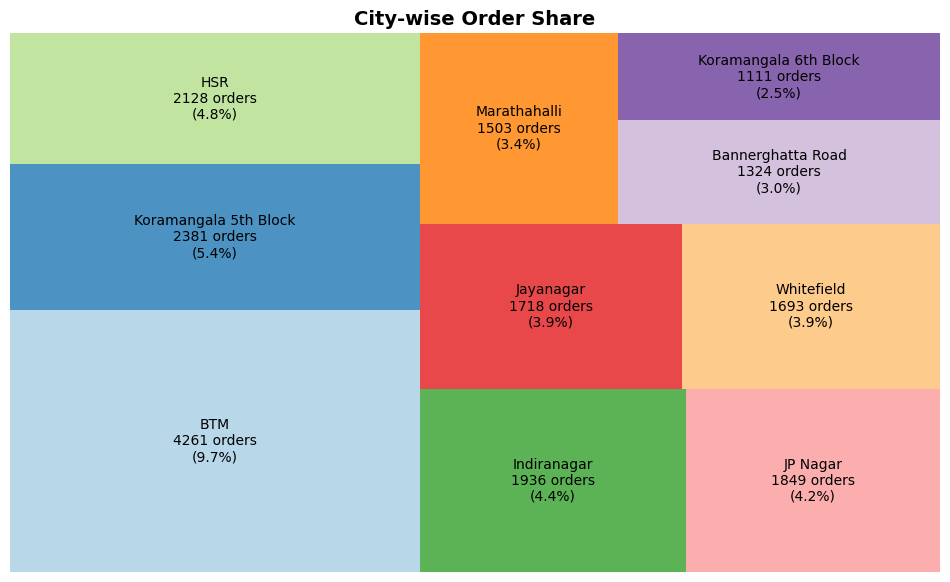

In [24]:
import squarify

# Count number of orders per city
city_orders = df['location'].value_counts().reset_index()
city_orders.columns = ['location', 'online_order']

# Calculate percentage
city_orders['Percentage'] = (city_orders['online_order'] / city_orders['online_order'].sum()) * 100

# Create labels with both count and percentage
city_orders['Label'] = city_orders.apply(lambda x: f"{x['location']}\n{x['online_order']} orders\n({x['Percentage']:.1f}%)", axis=1)

# Treemap plot
plt.figure(figsize=(12, 7))
squarify.plot(sizes=city_orders['online_order'].head(10), label=city_orders['Label'].head(10), alpha=0.8, color=plt.cm.Paired.colors)

# Remove axes for clean look
plt.axis('off')

# Title
plt.title("City-wise Order Share", fontsize=14, fontweight='bold')

# Show plot
plt.show()

In [25]:
# Data Cleaning: Drop missing values
df1 = df.dropna(subset=['name', 'dish_liked'])

# Explode dishes (split multiple dishes into separate rows)
df_exploded = df1.assign(dish_liked=df['dish_liked'].str.split(',')).explode('dish_liked')
df_exploded['dish_liked'] = df_exploded['dish_liked'].str.strip()

# Count dish occurrences per restaurant
dish_counts = df_exploded.groupby(['name', 'dish_liked']).size().reset_index(name='count')

# Convert 'count' to numeric and remove NaN values
dish_counts['count'] = pd.to_numeric(dish_counts['count'], errors='coerce')
dish_counts = dish_counts.dropna(subset=['count'])

# Select top 15 restaurants for better visualization
top_restaurants = dish_counts.groupby('name')['count'].sum().nlargest(15).index
dish_counts_filtered = dish_counts[dish_counts['name'].isin(top_restaurants)]

# Create Bubble Chart with better visibility
fig = px.scatter(dish_counts_filtered, 
                 x='name', 
                 y='dish_liked', 
                 size='count', 
                 color='dish_liked', 
                 hover_name='name', 
                 size_max=50, 
                 opacity=0.7)  # Reduce opacity to prevent overlap

# Improve layout for clarity
fig.update_layout(
    title="Restaurant vs. Dish Popularity", 
    xaxis_title="Restaurant Name", 
    yaxis_title="Dishes Liked", 
    legend_title="Dishes", 
    xaxis_tickangle=45,   # Rotate labels for readability
    height=800, width=1200  # Increase figure size
)

fig.show()